Often, people end up making a mistake in thinking that PCA selects some features out of the dataset and discards others. The algorithm actually constructs new set of properties based on combination of the old ones. Mathematically speaking, PCA performs a linear transformation moving the original set of features to a new space composed by principal component. These new features does not have any real meaning for us, only algebraic, therefore do not think that combining linearly features, you will find new features that you have never thought that it could exist.

In [247]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2, 2), rnd_num.rand(2, 500)).T

In [3]:
X

array([[0.70941896, 0.52412483],
       [0.21302846, 0.21153905],
       [0.88778615, 0.58785114],
       [1.10641564, 1.12645459],
       [1.12813005, 1.00861832],
       [0.95515351, 0.95276298],
       [0.59089232, 0.38229394],
       [0.76089979, 0.96035288],
       [1.19854148, 1.16772879],
       [0.90290885, 0.67390744],
       [0.11109078, 0.16016531],
       [0.09375981, 0.1500358 ],
       [0.47186003, 0.44807647],
       [0.96714698, 0.86936316],
       [1.10039828, 0.90722237],
       [0.25208049, 0.30322631],
       [0.79401203, 0.80355401],
       [0.41436443, 0.3301322 ],
       [1.03153139, 0.7944956 ],
       [0.93783172, 0.77231629],
       [0.9678276 , 0.83571306],
       [0.73967319, 0.85533118],
       [0.46916068, 0.39449521],
       [0.45253344, 0.54009396],
       [0.27548001, 0.46739354],
       [0.83950148, 0.55167481],
       [1.00038654, 0.93136924],
       [1.01431402, 0.72331209],
       [0.97188133, 0.64426247],
       [0.88345257, 1.02709237],
       [1.

In [4]:
# Change to negative sloping
X[:,0] = - X[:,0]

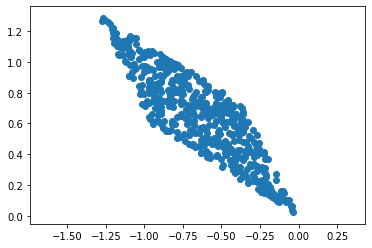

In [5]:
plt.scatter(X[:,0], X[:,1]);
plt.axis('equal');

### Principal Component Identification

In [6]:
pca = PCA(n_components=2)
pca.fit(X);

In [7]:
pca.components_

array([[-0.72953501,  0.68394347],
       [-0.68394347, -0.72953501]])

In [8]:
# Of the n_components how much variance does each component explain?
pca.explained_variance_ratio_

array([0.93620424, 0.06379576])

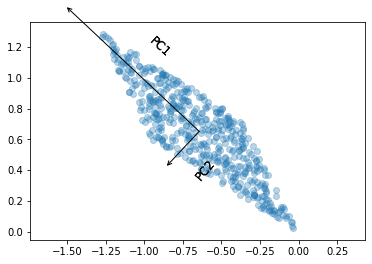

In [9]:
# pca_1 explains almost 94% of variance
# Remember that the requirement for pca_n is that pca_n must lie orthogonal to pca_n-1
# Here we see that in fact the components are orthogonal

plt.scatter(X[:,0], X[:,1], alpha=.3)

for k, v in zip(pca.explained_variance_, pca.components_):
    
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops = dict(arrowstyle='<-',
                     linewidth=1,
                     shrinkA=0,
                     shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_+vec, arrowprops=arrowprops)
    ax.text(-.90, 1.2, 'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(-.6, .4, 'PC2', ha='center', va='center', rotation=50, size=12)
    
plt.axis('equal');
#plt.show()

### Dimensionality reduction with PCA

In [10]:
pca = PCA(n_components=1) # Earlier we identified that one component can explain 94% of variance
# so here we are saying we want the first principal component
pca.fit(X); # gets components
X_trans = pca.transform(X)

In [11]:
X.shape, X_trans.shape

((500, 2), (500, 1))

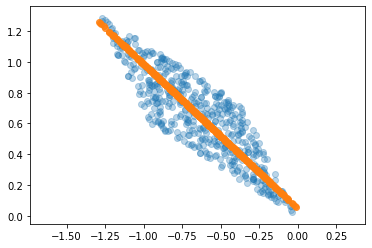

In [12]:
X_new = pca.inverse_transform(X_trans) 

plt.scatter(X[:,0], X[:,1], alpha=.3)
plt.scatter(X_new[:,0], X_new[:,1], alpha=.8) # This is our Principal component
plt.axis('equal');

In [92]:
# With other distributions
rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.logistic(size=(2,2)),rnd_num.logistic(size=(2, 500))).T

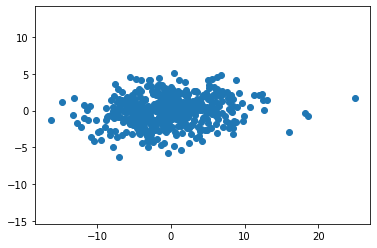

In [93]:
plt.scatter(X[:,0], X[:,1]);
plt.axis('equal');

In [94]:
pca = PCA(n_components=2)
pca.fit(X);

In [95]:

pca.components_

array([[ 0.99738915,  0.07221422],
       [ 0.07221422, -0.99738915]])

In [96]:
#Here we see that first component actually explains 88% of variance
pca.explained_variance_ratio_

array([0.88074084, 0.11925916])

### PCA For Feature Extraction

In [116]:
features, target = load_wine(return_X_y=True)

In [122]:
target_df = pd.DataFrame(target, columns=['wine'])

In [127]:
features_df = pd.DataFrame(features, columns=['alcohol',
                                              'malic_acid',
                                              'ash',
                                              'alcalinity_of_ash',
                                              'magnesium',
                                              'total_phenols',
                                              'flavanoids',
                                              'nonflav_phenols',
                                              'proanthocyanins',
                                              'color_intensity',
                                              'hue',
                                              'od280_od315',
                                              'proline'])

In [128]:
features_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [147]:
features_df['tmp'] = 1
target_df['tmp'] = 1

In [148]:
wine_data = pd.merge(features_df, target_df, on=['tmp'])

In [149]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,tmp,wine,temp
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,1
1,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,1
2,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,1
3,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,1
4,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1,0,1


In [152]:
wine_data = wine_data.drop('tmp', axis=1)

In [153]:
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline,wine
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
2,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
3,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
4,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0


In [156]:
X = wine_data.iloc[:,0:13]

In [158]:
y = wine_data['wine']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.2,
                                                    random_state=42)

In [215]:
# PCA is sensitive to scaling so it is important we scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test) # All new data has to be scaled based on X_train

In [216]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [217]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.362 0.192 0.111 0.07  0.066 0.049 0.043 0.027 0.022 0.019 0.017 0.013
 0.008]


In [218]:
np.cumsum(np.round(pca.explained_variance_ratio_, 3))

array([0.362, 0.554, 0.665, 0.735, 0.801, 0.85 , 0.893, 0.92 , 0.942,
       0.961, 0.978, 0.991, 0.999])

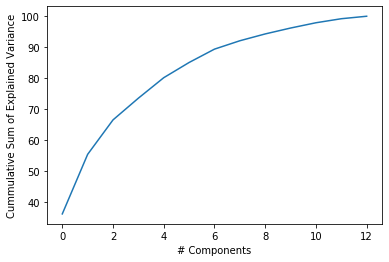

In [219]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, 3)) * 100.)
plt.xlabel('# Components')
plt.ylabel('Cummulative Sum of Explained Variance');

In [211]:
res = pca.transform(X_train_sc)
index_name = ['PCA_' + str(k) for k in range(0, len(res))]

In [231]:
df1 = pd.DataFrame(res, 
                   columns=X.columns,
                  index=index_name)[0:4]

In [233]:
df1.T

,PCA_0,PCA_1,PCA_2,PCA_3
alcohol,-0.543009,0.462045,-0.542236,-0.246588
malic_acid,0.381156,-0.328886,2.299805,2.819521
ash,1.280889,-0.215858,-1.504173,-0.307346
alcalinity_of_ash,-1.535052,1.410465,-0.318545,0.445388
magnesium,3.217875,0.391931,0.292466,0.405416
total_phenols,-0.756483,-1.017637,-0.144739,0.044746
flavanoids,-0.365117,0.589103,-0.414889,-0.575965
nonflav_phenols,-0.135843,0.572328,-0.794922,-0.140516
proanthocyanins,-0.964775,0.286372,-0.011305,-0.143795
color_intensity,-0.078824,0.089886,-0.664424,-0.864444


In [234]:
pca = PCA(n_components=7)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [237]:
X_train_pca = pca.transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)